# Subscription Retention Rate

## Goal

Subscriptions are a great business model. There are so many advantages for businesses in having subscribers compared to single purchase users: revenue by customer is much higher, it is possible to cross-sell to the subscribers, future revenue is easily predictable, there is a significant cost (time/effort/etc.) for the customer in canceling the subscription, etc.

It is no surprise then that so many companies have subscription business models (or try very hard to come up with one!).

The goal of this challenge is to model subscription retention rate.

## Challenge Description

Company XYZ started a subscription model in January, 2015. You get hired as a first data scientist at the end of August and, as a first task, you are asked to help executives understand how the subscription model is doing.

Therefore, you decide to pull data from all the users who subscribed in January and see, for each month, how many of them unsubscribed.
In particular, your boss is interested in:

- A model that predicts monthly retention rate for the different subscription price points


- Based on your model, for each price point, what percentage of users is still subscribed after at least 12 months?


- How do user country and source affect subscription retention rate? How would you use these findings to improve the company revenue?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

19_Subscription_Retention_Rate.ipynb  subscription.csv


In [4]:
df = pd.read_csv('subscription.csv')
print(df.shape)
df.head(10)

(500000, 7)


,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0
5,790,"January, 2015",49,US,ads,3,0
6,12214,"January, 2015",49,France,ads,1,0
7,7341,"January, 2015",29,US,ads,8,1
8,1026,"January, 2015",99,Spain,ads,1,0
9,11647,"January, 2015",49,US,ads,3,0


- user_id : the id of the user. Unique by user.
- subscription_signup_date : when the user signed up for the subscription. It is always Jan, 2015 in this table.
- subscription_monthly_cost : how much the user pays each month for the subscription (USD)
- source : marketing acquisition channel (SEO/Ads/Friend Referral)
- billing_cycles : total billing cycles as of the end of August.
- is_active : whether the subscription is still active (1) or not (0). If billing cycles is 8, it means the user has still an active subscription.

In [5]:
df.isnull().sum()

user_id                      0
subscription_signup_date     0
subscription_monthly_cost    0
country                      0
source                       0
billing_cycles               0
is_active                    0
dtype: int64

In [7]:
df.subscription_signup_date.value_counts()

January, 2015    500000
Name: subscription_signup_date, dtype: int64

In [9]:
df.is_active.value_counts()

0    450001
1     49999
Name: is_active, dtype: int64

In [10]:
df.billing_cycles.value_counts()

1    287374
2     79838
8     49999
3     35198
4     19753
5     12631
6      8767
7      6440
Name: billing_cycles, dtype: int64

In [12]:
df.billing_cycles[df.is_active==1].value_counts()

8    49999
Name: billing_cycles, dtype: int64

## Question 1

A model that predicts monthly retention rate for the different subscription price points

In [13]:
df.subscription_monthly_cost.value_counts()

49    300397
29    146362
99     53241
Name: subscription_monthly_cost, dtype: int64

In [19]:
print(df[df.subscription_monthly_cost==29].shape[0])

for i in range(1,9):
    print(i, df[(df.subscription_monthly_cost==29) & (df.billing_cycles == i)].shape[0])

146362
1 57441
2 21818
3 12037
4 7787
5 5505
6 4136
7 3111
8 34527


In [20]:
df.country.value_counts()

US         91731
UK         91252
Germany    88944
France     51662
India      48027
Italy      47459
Spain      44987
China      35938
Name: country, dtype: int64

In [21]:
print(df[df.country=='US'].shape[0])

for i in range(1,9):
    print(i, df[(df.country=='US') & (df.billing_cycles == i)].shape[0])

91731
1 49855
2 15801
3 7834
4 4547
5 2925
6 2066
7 1458
8 7245


In [22]:
df.source.value_counts()

ads                414469
seo                 61103
friend_referral     24428
Name: source, dtype: int64

In [29]:
df.groupby(['subscription_monthly_cost','country','source','billing_cycles']).size().reset_index(name = 'counts')

,subscription_monthly_cost,country,source,billing_cycles,counts
0,29,China,ads,1,2981
1,29,China,ads,2,835
2,29,China,ads,3,527
3,29,China,ads,4,411
4,29,China,ads,5,366
5,29,China,ads,6,319
6,29,China,ads,7,288
7,29,China,ads,8,8108
8,29,China,friend_referral,1,107
9,29,China,friend_referral,2,15


In [32]:
# First do a simple case:

df_cost = df.groupby(['subscription_monthly_cost','billing_cycles']).size().reset_index(name = 'counts')
df_cost

,subscription_monthly_cost,billing_cycles,counts
0,29,1,57441
1,29,2,21818
2,29,3,12037
3,29,4,7787
4,29,5,5505
5,29,6,4136
6,29,7,3111
7,29,8,34527
8,49,1,185145
9,49,2,53296


In [52]:
ratio_list = []
for cost in [29, 49, 99]:
    total = df[df.subscription_monthly_cost == cost].shape[0]
    ratio_list2 = [1]
    ratio = 1
    for i in range(0,7):
        ratio -= df_cost[df_cost.subscription_monthly_cost == cost].iloc[i,2]/total
        ratio_list2.append(ratio)
    ratio_list += ratio_list2

In [54]:
df_cost['ratio'] = ratio_list
df_cost

,subscription_monthly_cost,billing_cycles,counts,ratio
0,29,1,57441,1.000000
1,29,2,21818,0.607542
2,29,3,12037,0.458473
3,29,4,7787,0.376232
4,29,5,5505,0.323028
5,29,6,4136,0.285416
6,29,7,3111,0.257157
7,29,8,34527,0.235901
8,49,1,185145,1.000000
9,49,2,53296,0.383666


Text(0, 0.5, 'Ratio to Next Cycle')

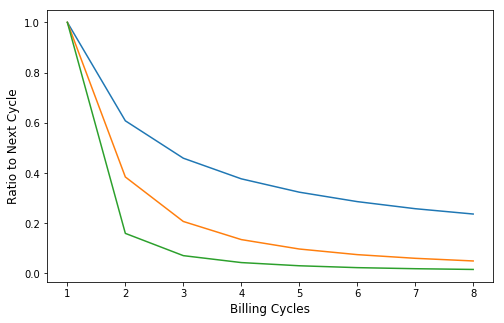

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))

for cost in [29, 49, 99]:
    X = df_cost[df_cost.subscription_monthly_cost == cost].billing_cycles
    Y = df_cost[df_cost.subscription_monthly_cost == cost].ratio
    ax.plot(X,Y)
    
ax.set_xlabel('Billing Cycles', fontsize = 12)
ax.set_ylabel('Ratio to Next Cycle', fontsize = 12)